In [24]:
# I analyzed dataset first and found several columns containing more than 50% of NULL values#
import pandas as pd
df=pd.read_csv('/Users/peterscheinsohn/Downloads/high-school-directory.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 69 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   dbn                               435 non-null    object 
 1   school_name                       435 non-null    object 
 2   borough                           435 non-null    object 
 3   building_code                     435 non-null    object 
 4   phone_number                      435 non-null    object 
 5   fax_number                        423 non-null    object 
 6   grade_span_min                    432 non-null    float64
 7   grade_span_max                    435 non-null    int64  
 8   expgrade_span_min                 31 non-null     float64
 9   expgrade_span_max                 33 non-null     float64
 10  bus                               434 non-null    object 
 11  subway                            358 non-null    object 
 12  primary_

In [26]:
# I cleaned dataset, by removing columns with 50% of NULL values. For the rest i replaced such values for obj as 'unknown' and mean for numeric(int, float)#
import pandas as pd
from pathlib import Path

# Define the path to your original CSV file
csv_path = Path("/Users/peterscheinsohn/Downloads/high-school-directory.csv")

# Read the original CSV file
df = pd.read_csv(csv_path)

# Drop columns with ≥ 50% missing values
df = df.loc[:, df.isnull().mean() < 0.50]

# Impute remaining NaNs in categorical columns with "Unknown"
cat_cols = df.select_dtypes(include=['object', 'category']).columns
df[cat_cols] = df[cat_cols].fillna('Unknown')

# Impute remaining NaNs in numeric columns with the mean
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = df[num_cols].apply(lambda s: s.fillna(s.mean()))

# Save the cleaned file with "_cleaned" appended to the original filename
clean_path = Path("/Users/peterscheinsohn/Downloads/high-school-directory_cleaned.csv")
df.to_csv(clean_path, index=False)

print(f"✅ Cleaned file saved at:\n{clean_path}")

✅ Cleaned file saved at:
/Users/peterscheinsohn/Downloads/high-school-directory_cleaned.csv


In [2]:
import pandas as pd
df=pd.read_csv('/Users/peterscheinsohn/Downloads/high-school-directory_cleaned.csv')
df_filtered=df.query("borough == 'Brooklyn'")

In [3]:
result=df_filtered['school_name'].count()

In [4]:
print(result)

121


In [7]:
import pandas as pd


df = pd.read_csv('/Users/peterscheinsohn/Downloads/high-school-directory_cleaned.csv')

result1 = df.query("borough == 'Brooklyn' & grade_span_min >= 9")


count_result = result1.shape[0]

print(f"Number of schools in Brooklyn offering grade 9 and above: {count_result}")

Number of schools in Brooklyn offering grade 9 and above: 98


In [16]:
df=pd.read_csv('/Users/peterscheinsohn/Downloads/high-school-directory_cleaned.csv')
result1=df.groupby('borough')['school_name'].count()
print(f" Number of schools per borough: {result1}")

 Number of schools per borough: borough
Bronx            118
Brooklyn         121
Manhattan        106
Queens            80
Staten Island     10
Name: school_name, dtype: int64


In [17]:
df=pd.read_csv('/Users/peterscheinsohn/Downloads/high-school-directory_cleaned.csv')
result2=df.groupby('borough')['total_students'].mean()
print(f" Average number of students per borough: {result2}")

 Average number of students per borough: borough
Bronx             490.406780
Brooklyn          699.212276
Manhattan         593.052153
Queens           1029.504636
Staten Island    1847.500000
Name: total_students, dtype: float64


In [18]:
result3=df.groupby('borough')['grade_span_max'].describe()
print(result3)

               count       mean       std   min   25%   50%   75%   max
borough                                                                
Bronx          118.0  11.906780  0.369506   9.0  12.0  12.0  12.0  12.0
Brooklyn       121.0  11.933884  0.381566   9.0  12.0  12.0  12.0  12.0
Manhattan      106.0  11.877358  0.472135   9.0  12.0  12.0  12.0  12.0
Queens          80.0  11.825000  0.497462  10.0  12.0  12.0  12.0  12.0
Staten Island   10.0  12.000000  0.000000  12.0  12.0  12.0  12.0  12.0


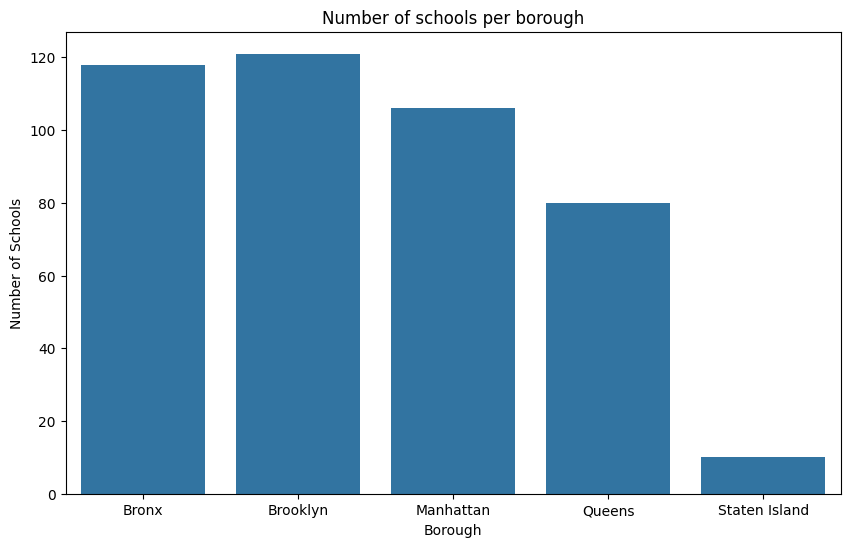

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
df = pd.read_csv('/Users/peterscheinsohn/Downloads/high-school-directory_cleaned.csv')

# Group by 'borough' and count the number of schools
result1 = df.groupby('borough')['school_name'].count().reset_index()
result1.columns = ['borough', 'count']

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=result1,
    x='borough',
    y='count'
)
plt.title("Number of schools per borough")
plt.xlabel("Borough")
plt.ylabel("Number of Schools")
plt.show()

In [ ]:
# Key Insignts 1) Dataset became more useful after removing column with significant proportion of null values, especially objects.
2) There is significant lack of high schools in Queens and  Staten Island, which results in bigger avg student number in this districts #